In [1]:
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_example):
    X = torch.normal(0, 1, (num_example, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 5.3
features, labels = synthetic_data(true_w, true_b, 1000)

print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000, 1])


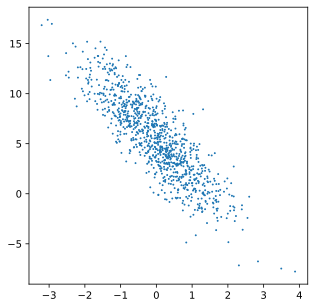

In [3]:
d2l.set_figsize((5, 5))
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

for X,y in data_iter(10, features, labels):
    print(X, "\n", y)
    break     

tensor([[-0.1653, -0.0513],
        [-0.7171, -1.0299],
        [ 0.7806,  0.0203],
        [ 1.1455,  0.5186],
        [ 1.4012, -0.5111],
        [ 2.0610,  0.7576],
        [-0.2911,  0.2527],
        [ 0.3510,  0.4421],
        [-1.3894, -0.2109],
        [-1.5962, -0.2574]]) 
 tensor([[5.1423],
        [7.3642],
        [6.8042],
        [5.8315],
        [9.8514],
        [6.8269],
        [3.8653],
        [4.5073],
        [3.2355],
        [2.9907]])


In [17]:
w = torch.normal(0, 0.01, (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

print(w)
print(b)

def linreg(X, w, b):
    return torch.matmul(X, w) + b

def square_loss(y_hat, y):
    return (y_hat - y)**2/2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

tensor([[0.0037],
        [0.0074]], requires_grad=True)
tensor([0.], requires_grad=True)


In [18]:
lr = 0.08
num_epochs = 4
net = linreg
loss = square_loss
batch_size = 400
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"epoch{epoch+1}, loss {float(train_l.mean()):f}")

epoch1, loss 14.704306
epoch2, loss 9.538643
epoch3, loss 6.192680
epoch4, loss 4.024909
